In [24]:
using JLD
using DSP: conv # For conv function in Psi
using Dates
using Random

using PyPlot

kse = include("Model_KSE.jl")

Main.Model_KSE

In [25]:
gen = "linn"     # this is just a reference designation it shows up in the
                # output file. I think of generatrion.

T        = 150+5*10^4 # Length (in seconds) of time of run
T_disc   = 5*10^4    # Length (in seconds) of time discarded
P        = 2π/sqrt(0.085)  # Period
N        = 96  # Number of fourier modes used
h        = 1e-3 # Timestep
g        = x -> cos(π*x/16)*(1 + sin.(π*x/16))
obs_gap  = 100
seed     = 2021

Δt = h*obs_gap

0.1

In [26]:
Random.seed!(seed)
uu, vv, tt =  @time kse.my_KSE_solver(T; T_disc, P, N, h, g, n_gap = obs_gap)

 28.114046 seconds (94.06 M allocations: 81.532 GiB, 9.77% gc time)


([1.0738967852146069 1.0738526277882379 … -0.7860691940610842 -0.775337279454958; 0.681535996714013 0.6816545940943737 … -1.1978719741862538 -1.1853018203500139; … ; 1.9107081457667359 1.9104513574283648 … -0.19006851250557633 -0.18182646022926585; 1.47249059177319 1.4723613117320722 … -0.46154954223858247 -0.452182672649845], Complex{Float64}[-0.12214831644151783 + 0.0im -0.12214831644151783 + 0.0im … -0.12214831644151783 + 0.0im -0.12214831644151783 + 0.0im; -1.0296061549714184 - 0.7132587855132277im -1.0345285786367935 - 0.7208238356925967im … -0.18733308791939396 + 0.25160268559456894im -0.18147500126169738 + 0.2552487475437166im; … ; 1.8280929045674201 + 1.1707264909742403im 1.8248714405057003 + 1.1633677815269887im … -0.8753713535841173 - 1.4252787736381594im -0.8765422925133498 - 1.4358819540018548im; 0.3911509398544643 + 0.05128316503240994im 0.4086722444545772 + 0.0408025782307596im … -0.15007263528261722 + 0.018922607314255754im -0.1415122297918357 + 0.011878448555932012im], 

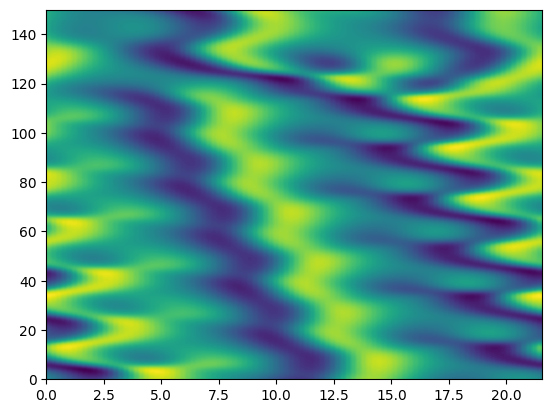

PyObject <matplotlib.image.AxesImage object at 0x7fd7547acd00>

In [28]:
t_start = 0
t_stop = 150
ind_start = floor(Int,t_start/Δt)+1
ind_stop =floor(Int,t_stop/Δt)

H1 = imshow(uu[:,ind_start:ind_stop]', extent=[0,21.55,0,150], aspect="auto")

In [10]:
ind_start

1

In [11]:
ind_stop

100

In [15]:
uu

96×0 Array{Float64,2}

In [ ]:
paramaters = Dict(
   "gen" => gen,
    "T" => T,
   "T_disc" => T_disc,
   "P" => P,
   "N" => N,
   "h" => h,
   "g" => "x -> cos(π*x/16)*(1 + sin.(π*x/16))",
   "obs_gap" => obs_gap,
   "seed" => seed,
   "tm" => now()
   )

server = startswith(pwd(), "/u5/jaredm") ? true : false
println("on server = $server")
sol_file = server ? "../../../data/KSE_Data/KSE_sol_$gen.jld" :
   "Examples/KSE/Data/KSE_sol_$gen.jld"
println("Sol save location: " * sol_file)

dat = Dict("dat_uu" => uu, "dat_vv" => vv, "dat_tt" => tt)
Data = merge(paramaters, dat)
save(sol_file, Data)
println("data saved")